In [44]:
###TRACK VISUALISER
# import numpy as np
from collections import Counter
def drawbar(innums, inbarchar='░'):
    assert isinstance(innums, (tuple, list))
    leninnums = len(innums)
    assert leninnums > 0
    if (leninnums is 1): 
        return '#' #potential other characters: ǂ#⌿⧥ᚋ
    if (innums[0] == innums[1]):
        if leninnums is 2:
            return '#'
        else:
            assert isinstance(innums[2], str)
            return innums[2]
    if (leninnums is 2) and isinstance(innums[1], str):
        return innums[1]
    if leninnums > 2:
        assert isinstance(innums[2], str)
        inbarchar = innums[2]
    return f'''[{inbarchar*(innums[1]-innums[0]-1)}]'''
def getlast(inbar):
    assert isinstance(inbar, (tuple, list))
    return (inbar[1] if len(inbar)>1 else inbar[0])
def drawtrack(inbarlist, intrackwidth=100, plus=True):
    #inbarlist is a tuple of tuples, ORDERED by the first element.
    #inbarlist represents NON-OVERLAPPING bars to be drawn.
    #example: inbarlist = ((2,20), (23,), (27,28))
    assert isinstance(inbarlist, (tuple, list))
    endslist = (-1,) + tuple(getlast(inbar) for inbar in inbarlist)
    filllenlist = tuple(max(0,inbar[0]-endslist[ind]-1) for ind, inbar in enumerate(tuple(inbarlist) + ((intrackwidth,),)))
    mytrack = ''.join(['-'*filllenlist[ind] + drawbar(inbar) for ind, inbar in enumerate(inbarlist)] + ['-'*filllenlist[-1]])
    if plus:
        mytrack = '+' + mytrack + '+'
    return mytrack
def gentracks(inbarlist):
    #inbarlist is a tuple of tuples, ORDERED by the first element.
    #it is ok for inbarlist to have overlapping bars
    #generates multiple tracks so no track has overlapping bars
    mytracks=[]
    for inbar in inbarlist:
        for track in mytracks:
            if getlast(track[-1]) < inbar[0]:
                track.append(inbar)
                break
        else: #runs if forloop does not break
            mytracks.append([inbar])
    return mytracks
def drawtracks(intracklist, intrackwidth=100, plus=True):
    drawntracks = [drawtrack(track, intrackwidth, plus=plus) for track in intracklist]
    return '\n'.join(drawntracks)
def flattenonedeep(intup):
    #using simple solution for one-deep nesting #https://stackoverflow.com/a/11264751
    #if flattening of unknown nesting structure is needed use #https://stackoverflow.com/a/5828872
    return [val for sub in intup for val in sub]
def fod(intup):
    return flattenonedeep(intup)
def getpois(inbarlist):
    pois = tuple(poi[0] for poi in sorted(Counter(flattenonedeep(inbarlist)).items()))
    return pois
def drawpois(inbarlist, intrackwidth=100, singlepoint='|', multipoint='║', plus=True):
    #draw points of interest
    pois = tuple((poi[0], poi[0], (singlepoint if poi[1] is 1 else multipoint)) for poi in sorted(Counter(flattenonedeep(inbarlist)).items()))
    return drawtrack(pois, intrackwidth=intrackwidth, plus=plus)
def drawtimeline(inbarlist, intrackwidth=100, pois=False, colnums=False, plus=True):
    assert isinstance(inbarlist, (tuple, list))
    mytracks = gentracks(inbarlist)
    dts = drawtracks(mytracks, intrackwidth=intrackwidth, plus=plus)
    if pois:
        dts+='\n' + drawpois(inbarlist, intrackwidth=intrackwidth, plus=plus)
    if colnums:
        dts = '|123456789'*int((intrackwidth+1)//10 + ((intrackwidth+1)%10>0)) + '\n' + dts
        if plus:
            dts = '+' + dts
    return dts
def dtl(inbarlist, intrackwidth=100, pois=False, colnums=False, plus=True):
    return drawtimeline(inbarlist, intrackwidth=intrackwidth, pois=pois, colnums=colnums, plus=plus)
def gettimelinescaled(inbarlist, innumwidth=100, intrackwidth=100, auto=False):
    #innumwidth is the max num value. It will be scaled to fit the intrackwidth.
    if auto:
        myinnumwidth=max(flattenonedeep(inbarlist))+1
        return gettimelinescaled(inbarlist, innumwidth=myinnumwidth, intrackwidth=intrackwidth)
    scaledbarlist=tuple(tuple((inbarval*intrackwidth//innumwidth if (isinstance(inbarval, int) or'numpy.int' in str(type(inbarval))) else inbarval) for inbarval in inbar)for inbar in inbarlist)
    return scaledbarlist
def drawtimelinescaled(inbarlist, innumwidth=100, intrackwidth=100, pois=False, colnums=False, plus=True, auto=False):
    #innumwidth is the max num value. It will be scaled to fit the intrackwidth.
    scaledbarlist = gettimelinescaled(inbarlist, innumwidth=innumwidth, intrackwidth=intrackwidth, auto=auto)
    dtl = drawtimeline(scaledbarlist, intrackwidth=intrackwidth, pois=pois, colnums=colnums, plus=plus)
    return dtl
def dtls(inbarlist, innumwidth=100, intrackwidth=100, pois=False, colnums=False, plus=True, auto=False):
    return drawtimelinescaled(inbarlist, innumwidth=innumwidth, intrackwidth=intrackwidth, pois=pois, colnums=colnums, plus=plus, auto=auto)

In [2]:
import librosa, librosa.display
import IPython.display as ipd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import pathlib

In [1]:
import numpy as np

In [2]:
pathlib.Path("/Volumes/Harvest/Harvest File Dump/beep1.mp3").exists()

NameError: name 'pathlib' is not defined

In [7]:
beep1 = pathlib.Path("/Volumes/Harvest/Harvest File Dump/beep1.mp3")
beep2 = pathlib.Path("/Volumes/Harvest/Harvest File Dump/beep2.mp3")

In [25]:
import librosa, librosa.display
import IPython.display as ipd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
innames={'1':'clip1 beep hello.m4a',
'1L':'clip1L beep hello.wav',
'1R':'clip1R beep hello.wav',
'2':'clip2 mmmm hello.m4a',
'2L':'clip2L mmmm hello.wav',
'2R':'clip2R mmmm hello.wav'}
cl={}
for key, value in innames.items():
    mypath=pathlib.Path('/Users/evn/Downloads')/value
    #s, r = librosa.load(mypath, sr=None)
    cl[key]=librosa.load(mypath, sr=None)
    librosa.resample()

/Users/evn/.virtualenvs/audioPlayground/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/evn/.virtualenvs/audioPlayground/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


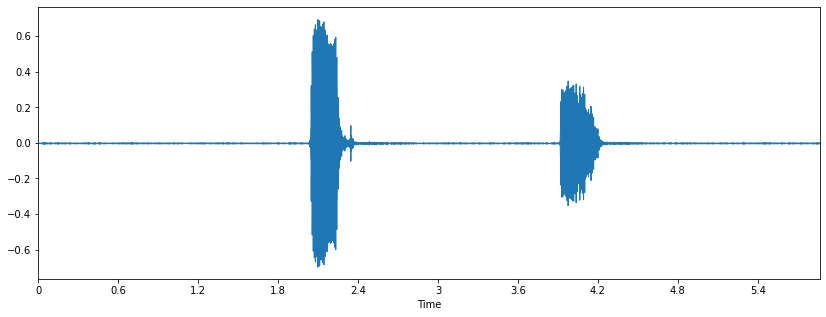

In [42]:
plt.figure(figsize=(14, 5)).patch.set_alpha(0.7)
librosa.display.waveplot(*cl['1L'])
ipd.Audio(cl['1L'][0],rate=cl['1L'][1])

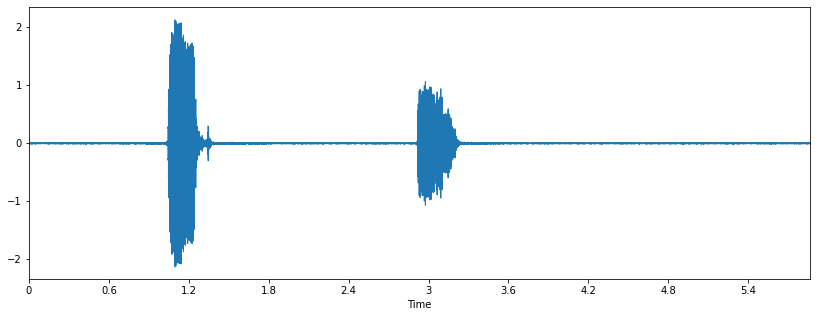

In [45]:
plt.figure(figsize=(14, 5)).patch.set_alpha(0.7)
s=librosa.resample(*cl['1L'], 5000, res_type='scipy', scale=True)
s=np.roll(s,-5000)
librosa.display.waveplot(s,5000)
ipd.Audio(s,rate=5000)

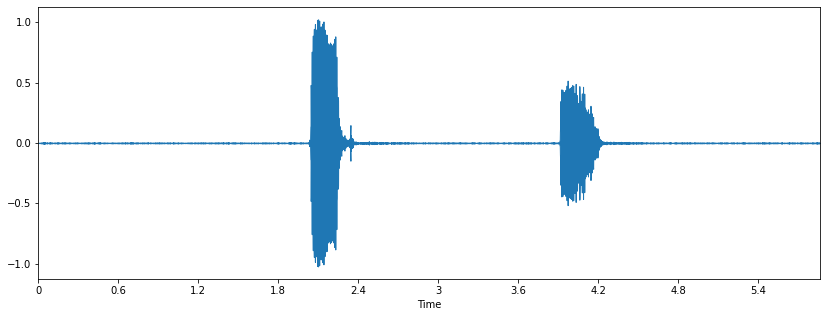

In [48]:
s1=librosa.resample(*cl['1L'], 22050, res_type='scipy', scale=True)
plt.figure(figsize=(14, 5)).patch.set_alpha(0.7)
librosa.display.waveplot(s1,22050)
ipd.Audio(s1,rate=22050)

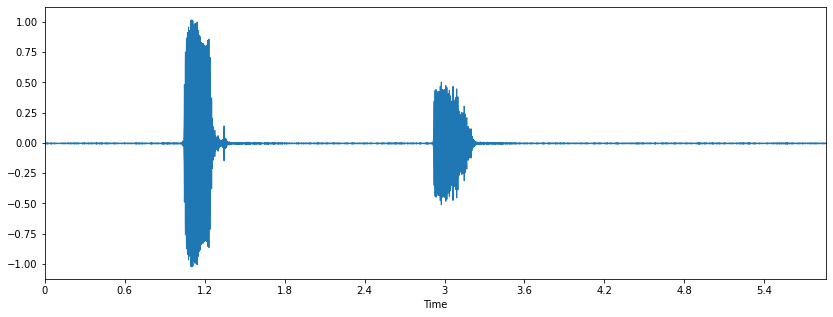

In [49]:
s2=librosa.resample(s, 5000, 22050, res_type='scipy', scale=True)
plt.figure(figsize=(14, 5)).patch.set_alpha(0.7)
librosa.display.waveplot(s2,22050)
ipd.Audio(s2,rate=22050)

In [56]:
print(s1.shape[0]-s2.shape[0])
safe_compute_shift(s1,s2, retxy=False, v=True)

-2
padding different signal lengths


-22049

In [57]:
-22049/22050.

-0.9999546485260771

In [27]:
np.array_equal(cl['1L'][0],cl['1R'][0])
plt.fill_between()

True

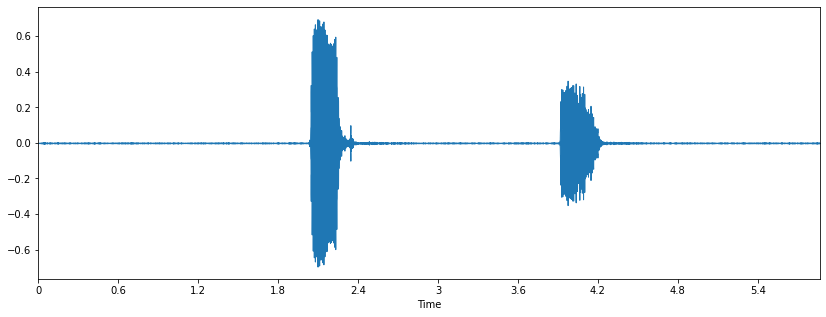

In [20]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(*cl['1R'])

In [14]:
cl['1']

(array([ 0.00015259,  0.00018311,  0.00021362, ..., -0.00085449,
        -0.00091553, -0.00094604], dtype=float32),
 48000)

In [10]:
x1, sr1 = librosa.load(beep1, sr=None)
ipd.Audio(x1, rate=sr1)

/Users/evn/.virtualenvs/audioPlayground/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [9]:
x2, sr2 = librosa.load(beep2, sr=None)
ipd.Audio(x2, rate=sr2)

/Users/evn/.virtualenvs/audioPlayground/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [11]:
x1=x1[:int(len(x1)/2)]
ipd.Audio(x1, rate=sr1)

In [12]:
x2=np.concatenate([np.zeros(10001), x1])

In [46]:
len(x1)
scs=safe_compute_shift(x1, x2)
bars=((0,len(x1)),(scs,scs+len(x2)))
#dtls=drawtimelinescaled(bars, innumwidth=(scs+len(x2)), pois=True, colnums=True)
dtls=drawtimelinescaled(bars, pois=True, colnums=True, auto=True)
#dtls=gettimelinescaled(bars, auto=True)
print(f'{bars}')

print(dtls)
print(getpois(gettimelinescaled(bars, auto=True)))
print(tuple(sorted(flattenonedeep(bars))))

#print(f'bars: {bars}')
#print(f'scaledtimeline: {gettimelinescaled(bars, intrackwidth=100, innumwidth=(scs+len(x2)))}')

((0, 39168), (10001, 59170))
+|123456789|123456789|123456789|123456789|123456789|123456789|123456789|123456789|123456789|123456789|123456789
+[░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░]---------------------------------+
+----------------[░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░]+
+|---------------|-------------------------------------------------|--------------------------------|+
(0, 16, 66, 99)
(0, 10001, 39168, 59170)


In [49]:
def easyprepend(base, prefix): #numpy doesnt have a prepend function
    return np.append(prefix, base)

In [53]:
x1_out = easyprepend(x1, np.tile(0, scs))
ipd.Audio(x1_out, rate=sr1)

In [52]:
ipd.Audio(x1, rate=sr1)

In [39]:
'numpy.int' in str(type(bars[1][1]))

True

In [29]:
np.concatenate([np.zeros(10000), x1])

array([0.        , 0.        , 0.        , ..., 0.02081299, 0.09448242,
       0.15692139])

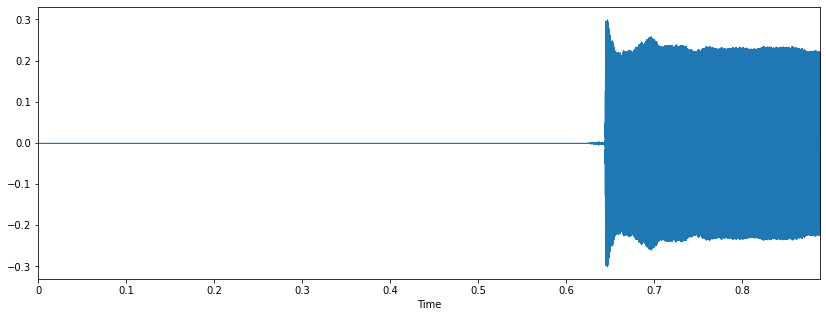

In [19]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x1, sr1)

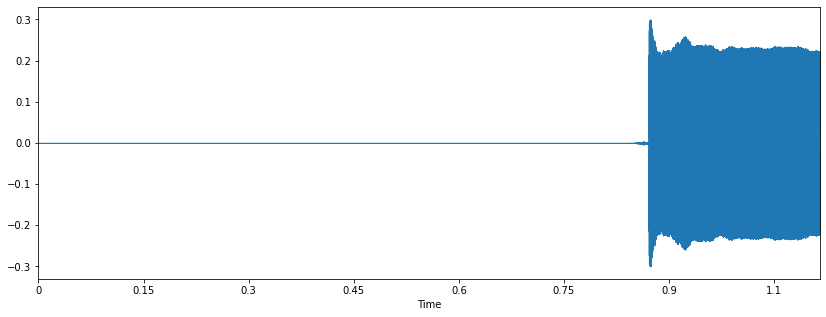

In [24]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x2, sr2)

In [30]:
sr1

44100

In [31]:
x2

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [52]:
#modified from https://lexfridman.com/fast-cross-correlation-and-time-series-synchronization-in-python/
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift
 
def cross_correlation_using_fft(x, y, retcc=False):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    if retcc:
        return cc
    return fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x # shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

#Added by Evan
def safe_compute_shift(x,y, retxy=False, v=False): #padding shorter audio stream with 0's
    lenx = len(x)
    leny = len(y)
    if(lenx != leny):
        if v: print('padding different signal lengths')
        if(lenx < leny):
            #x += [0] * (leny - lenx)
            x = np.append(x, np.tile(0, (leny - lenx)))
        else:
            #y += [0] * (lenx - leny)
            y = np.append(y, np.tile(0, (lenx - leny)))
    assert len(x) == len(y)
    if retxy:
        return (x, y)
    shift = compute_shift(x, y)
    return shift

def safe_cross_correlation_using_fft(x,y, retcc=False, v=False): #padding shorter audio stream with 0's
    lenx = len(x)
    leny = len(y)
    if(lenx != leny):
        if v: print('padding different signal lengths')
        if(lenx < leny):
            #x += [0] * (leny - lenx)
            x = np.append(x, np.tile(0, (leny - lenx)))
        else:
            #y += [0] * (lenx - leny)
            y = np.append(y, np.tile(0, (lenx - leny)))
    assert len(x) == len(y)
    scc = cross_correlation_using_fft(x, y, retcc=retcc)
    return scc

In [2]:
[3.5*n for n in [6,-3,-1,0,8,7,-2]]

[21.0, -10.5, -3.5, 0.0, 28.0, 24.5, -7.0]